In [1]:
code = 'AAPL'
N = 500
D = 120

In [2]:
# importing Libraries

# importing pandas as pd
import pandas as pd

# importing numpy as np
# for Mathematical calculations
import numpy as np

# importing pyplot from matplotlib as plt
# for plotting graphs
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline


In [3]:
# importing time-series data
#reliance = pd.read_csv('AAPL.csv', index_col='Date',
#					parse_dates=True)
reliance = pd.read_csv('AAPL.csv')
close = reliance.loc[len(reliance)-N:,'Close']
print(close.shape)
close.head()
# Printing dataFrame
#reliance.head()


(500,)


759    124.760002
760    120.529999
761    119.989998
762    123.389999
763    122.540001
Name: Close, dtype: float64

In [4]:
# updating our dataFrame to have only
# one column 'Close' as rest all columns
# are of no use for us at the moment
# using .to_frame() to convert pandas series
# into dataframe.
reliance = reliance['Close'].to_frame()

# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 30
reliance['MA'] = reliance['Close'].rolling(D).mean()

# removing all the NULL values using
# dropna() method
reliance.dropna(inplace=True)

# printing Dataframe
#reliance


In [5]:
close  = reliance.loc[len(reliance)-N:,'Close']
close.head()

ma = reliance.loc[len(reliance)-N:,'MA']

In [6]:
closes = np.array(close)
MA = np.array(ma)-12
#closes
#MA

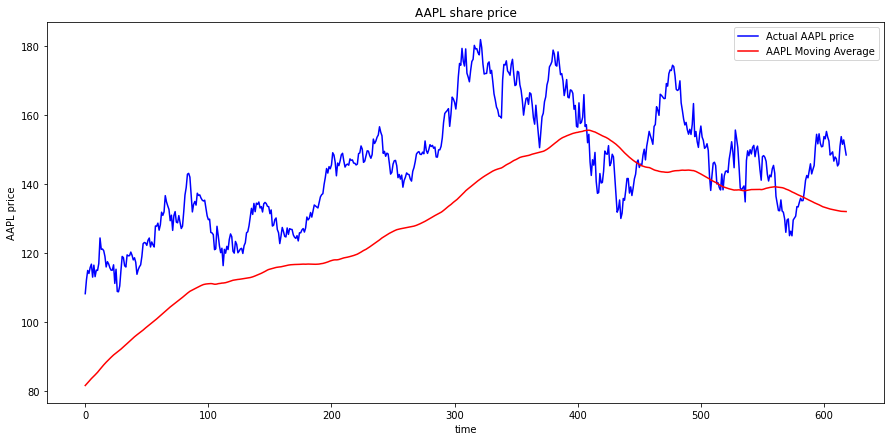

In [8]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(closes, color='blue', label=f"Actual {code} price")
plt.plot(MA, color= 'red', label=f"{code} Moving Average")
plt.title(f"{code} share price")
plt.xlabel("time")
plt.ylabel(f"{code} price")
plt.legend()
plt.show()